# 🛠️ Créer des graphiques animés (GIF) simplement en Python

*Auteur : Pierre-Loïc Bayart*

Ce notebook explique comment créer simplement des graphiques animés sous forme de GIF. Seulement **3 bibliothèques Python externes** sont utilisées :

- [numpy](https://numpy.org/doc/stable/) : pour **travailler avec les données** et **stocker temporairement** les images des graphiques

- [matplotlib](https://matplotlib.org) : pour **générer les graphiques** (pour créer plus simplement des graphiques complexes, on peut aussi utiliser [seaborn](https://seaborn.pydata.org))

- [imageio](https://imageio.readthedocs.io/en/stable/) : pour **générer le GIF** final à partir des images des graphiques

Le code est découpé en **deux fonctions** : `create_chart()` pour créer les graphiques individuellement et `create_GIF()` pour créer le GIF.

## Import des bibliothèques

In [21]:
# Bibliothèque pour travailler avec les données
import numpy as np
from numpy.typing import NDArray
# Bibliothèque pour afficher les données
import matplotlib.pyplot as plt
# Bibliothèque pour créer le GIF
import imageio
# Bibliothèque pour afficher le GIF dans le notebook
from IPython.display import Image, display

## Création des graphiques

In [22]:
def create_chart(param: int = 0) -> NDArray[np.uint8]:
    """Génère un graphique et le retourne sous forme de tableau numpy.

    Args:
        param (int, optional): paramètre qui varie pour l'animation GIF (à adapter)

    Returns:
        NDArray[np.uint8]: Image du graphique sous forme de tableau numpy.
    """
    # Génération des données
    np.random.seed(param)
    x = 50 - 100 * np.random.rand(100)
    y = 2 * x + 10 * np.random.randn(100)
    
    # Création et configuration du graphique
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.scatter(x, y, color='blue')
    ax.set_xlabel("Caractéristique 1")
    ax.set_ylabel("Caractéristique 2")
    fig.suptitle("Graphique d'illustration", fontsize=20)
    
    # Conversion du graphique en tableau numpy
    fig.canvas.draw()
    image_str = fig.canvas.buffer_rgba()
    image_np = np.frombuffer(image_str, dtype=np.uint8)
    width, height = fig.canvas.get_width_height()
    image_np = image_np.reshape((height, width, 4))
    plt.close(fig)
    
    return image_np

## Création du GIF

In [24]:
def create_gif(file_name: str = "chart.gif", duration: int = 1000) -> None:
    """Crée et sauvegarde une animation GIF à partir de graphiques générés.

    Args:
        file_name (str, optional): Nom du fichier GIF à sauvegarder. Par défaut à "chart.gif".
        duration (int, optional): Durée de chaque frame en millisecondes. Par défaut à 1000.
    """
    frames = []
    for param in range(5):
        intermediaire = create_chart(param)
        frames.append(intermediaire)
    
    # Sauvegarde de l'animation GIF
    imageio.mimsave(file_name, frames, duration=duration, loop=0)
    
    # Affichage du GIF dans le notebook
    display(Image(filename=file_name))

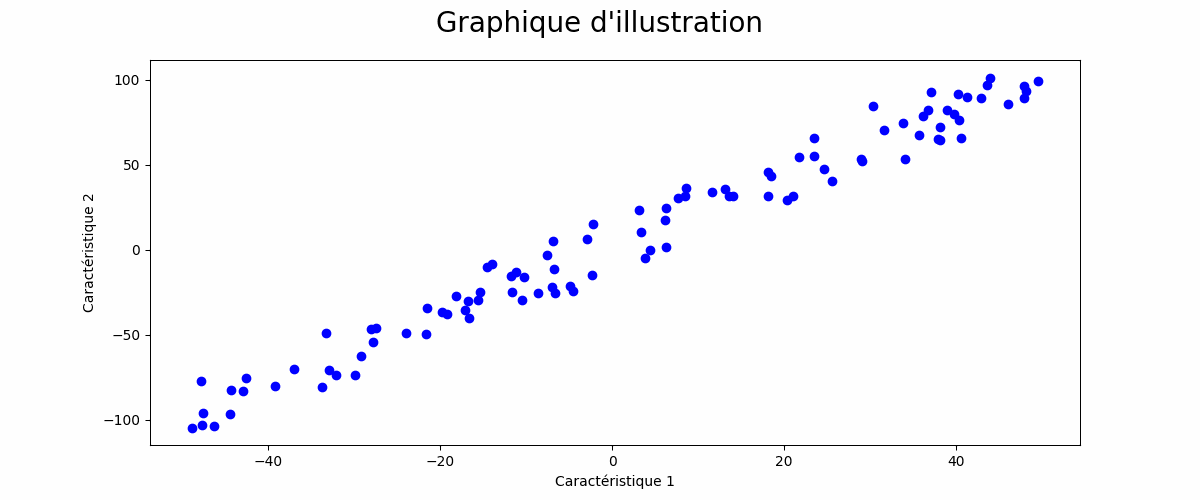

In [25]:
create_GIF(duration=500)